In [112]:
import pandas as pd
from pandas.tseries.offsets import BDay
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import datasets
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split

isBusinessDay = BDay().onOffset
eth = 'Datasets/ETH2.csv'
eth_df = pd.read_csv(eth)
match_series = pd.to_datetime(eth_df['Date']).map(isBusinessDay)
eth_df = eth_df[match_series]
eth_df

/Users/sareddyrojareddy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/base.py:870: FutureWarning: onOffset is a deprecated, use is_on_offset instead
  new_values = map_f(values, mapper)


,Date,Price,Open,High,Low,Vol.,Change %
0,1-Mar-22,2949.28,2922.44,3036.59,2858.54,917.00K,0.0092
1,28-Feb-22,2922.50,2616.34,2949.44,2574.12,899.19K,0.1170
4,25-Feb-22,2767.53,2596.52,2830.31,2573.39,828.87K,0.0659
5,24-Feb-22,2596.52,2578.54,2732.02,2303.07,1.85M,0.0071
6,23-Feb-22,2578.15,2637.38,2749.80,2578.15,636.50K,-0.0220
...,...,...,...,...,...,...,...
2176,16-Mar-16,12.88,13.06,13.89,12.62,19.24K,-0.0138
2177,15-Mar-16,13.06,12.63,13.42,11.98,39.73K,0.0448
2178,14-Mar-16,12.50,15.07,15.07,11.40,92.18K,-0.1705
2181,11-Mar-16,11.95,11.75,11.95,11.75,0.18K,0.0170


In [113]:
bitcoin = 'Datasets/BTC.csv'
bitcoin_df = pd.read_csv(bitcoin)
match_series_bitcoin = pd.to_datetime(bitcoin_df['Date']).map(isBusinessDay)
bitcoin_df = bitcoin_df[match_series_bitcoin]
bitcoin_df

/Users/sareddyrojareddy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/base.py:870: FutureWarning: onOffset is a deprecated, use is_on_offset instead
  new_values = map_f(values, mapper)


,Date,Price,Open,High,Low,Vol.,Change %
0,3/2/22,44151.1,44442.0,44777.0,43876.0,6.13K,-0.0065
1,3/1/22,44442.0,43202.0,44939.0,42878.0,6.34K,0.0287
2,2/28/22,43202.0,37734.0,44198.0,37502.0,8.45K,0.1449
5,2/25/22,39243.0,38380.0,39717.0,38071.1,6.43K,0.0225
6,2/24/22,38380.0,37292.0,39716.0,34435.0,17.88K,0.0292
...,...,...,...,...,...,...,...
3671,2/8/12,5.6,5.6,5.6,5.6,-,-0.0158
3672,2/7/12,5.7,5.7,5.7,5.7,-,0.0440
3673,2/6/12,5.4,5.4,5.4,5.4,-,-0.0422
3676,2/3/12,6.0,6.0,6.0,6.0,-,-0.0230


In [123]:
#Reading tesla,gold and S&P
tesla_df = pd.read_csv('Datasets/Tesla.csv')
tesla_df = tesla_df.rename(columns={"Close/Last": "Last_tesla","Volume":"Trading_Volume_Tesla","Open": "Open_tesla","High": "High_tesla","Low": "Low_tesla"})
tesla_df['Change_Tesla'] = (tesla_df['Open_tesla'] - tesla_df['Last_tesla'])/tesla_df['Open_tesla']

gold_df = pd.read_csv('Datasets/Gold.csv')
gold_df = gold_df.rename(columns={"Close/Last": "Last_gold","Volume":"Trading_Volume_Gold","Open": "Open_gold","High": "High_gold","Low": "Low_gold"})
gold_df['Change_Gold'] = (gold_df['Open_gold'] - gold_df['Last_gold'])/gold_df['Open_gold']


sp_df = pd.read_csv('Datasets/SP500.csv')
sp_df = sp_df.rename(columns={"Close/Last": "Last_SP","Volume":"Trading_Volume_SP","Open": "Open_SP","High": "High_SP","Low": "Low_SP"})
sp_df['Change_SP'] = (sp_df['Open_SP'] - sp_df['Last_SP'])/sp_df['Open_SP']

sp_df


,Date,Last_SP,Trading_Volume_SP,Open_SP,High_SP,Low_SP,Change_SP
0,02/28/2022,4373.94,--,4354.17,4388.84,4315.12,-0.004540
1,02/25/2022,4384.65,--,4298.38,4385.34,4286.83,-0.020070
2,02/24/2022,4288.70,--,4155.77,4294.73,4114.65,-0.031987
3,02/23/2022,4225.50,--,4324.93,4341.51,4221.51,0.022990
4,02/22/2022,4304.76,--,4332.74,4362.12,4267.11,0.006458
...,...,...,...,...,...,...,...
2546,03/07/2012,1352.63,--,1343.39,1354.85,1343.39,-0.006878
2547,03/06/2012,1343.36,--,1363.63,1363.63,1340.03,0.014865
2548,03/05/2012,1364.33,--,1369.59,1369.59,1359.13,0.003841
2549,03/02/2012,1369.63,--,1374.09,1374.53,1366.42,0.003246


In [132]:
#rename columns
eth_df = eth_df.rename(columns ={"Price": "Last_eth","Open": "Open_eth","High": "High_eth","Low": "Low_eth","Change %":"Change_ETH"})
bitcoin_df = bitcoin_df.rename(columns={"Price": "Last_bitcoin","Open": "Open_bitcoin","High": "High_bitcoin","Low": "Low_bitcoin","Change %":"Change_BTC"})

#create dataframe using ETH and Bitcoin datasets
crypto = pd.DataFrame(eth_df,columns=['Date','Last_eth','Change_ETH'])

crypto = crypto.join(bitcoin_df['Last_bitcoin'])
crypto = crypto.join(bitcoin_df['Change_BTC'])
#crypto = crypto.join(bitcoin_df['High_bitcoin'])
#crypto = crypto.join(bitcoin_df['Low_bitcoin'])
crypto = crypto.join(tesla_df['Last_tesla'])
crypto = crypto.join(tesla_df['Trading_Volume_Tesla'])
crypto = crypto.join(tesla_df['Change_Tesla'])

crypto = crypto.join(gold_df['Last_gold'])
crypto = crypto.join(gold_df['Trading_Volume_Gold'])
crypto = crypto.join(gold_df['Change_Gold'])

crypto = crypto.join(sp_df['Last_SP'])
crypto = crypto.join(sp_df['Change_SP'])


crypto = crypto.dropna()
crypto



#crypto['Increase/Decrease'] = np.where(crypto['Change_BTC'] < 0, False, True)


#Increased = crypto[crypto['Increase/Decrease'] == True]
#Decreased = crypto[crypto['Increase/Decrease'] == False]

crypto.head()


,Date,Last_eth,Change_ETH,Last_bitcoin,Change_BTC,Last_tesla,Trading_Volume_Tesla,Change_Tesla,Last_gold,Trading_Volume_Gold,Change_Gold,Last_SP,Change_SP
0,1-Mar-22,2949.28,0.0092,44151.1,-0.0065,870.43,33002290,-0.067999,1900.7,239416.0,0.010567,4373.94,-0.004540
1,28-Feb-22,2922.50,0.1170,44442.0,0.0287,809.87,25355920,-0.000791,1887.6,220963.0,0.009913,4384.65,-0.020070
5,24-Feb-22,2596.52,0.0071,39243.0,0.0225,856.98,22833950,0.032754,1899.8,155484.0,0.000841,4348.87,0.008142
6,23-Feb-22,2578.15,-0.0220,38380.0,0.0292,876.35,18392810,0.040416,1902.0,251680.0,-0.016026,4380.26,0.017011
7,22-Feb-22,2636.13,0.0258,37292.0,-0.0263,923.39,17098130,-0.010218,1871.5,136348.0,-0.008623,4475.01,-0.004323


In [142]:
#Categorizing

def categorise(row):  
    if row['Change_BTC'] <= 0 :
        return 0
        
    return 1

crypto['Increase/Decrease'] = crypto.apply(lambda row: categorise(row), axis=1)
crypto


crypto.to_csv('crypto.csv')



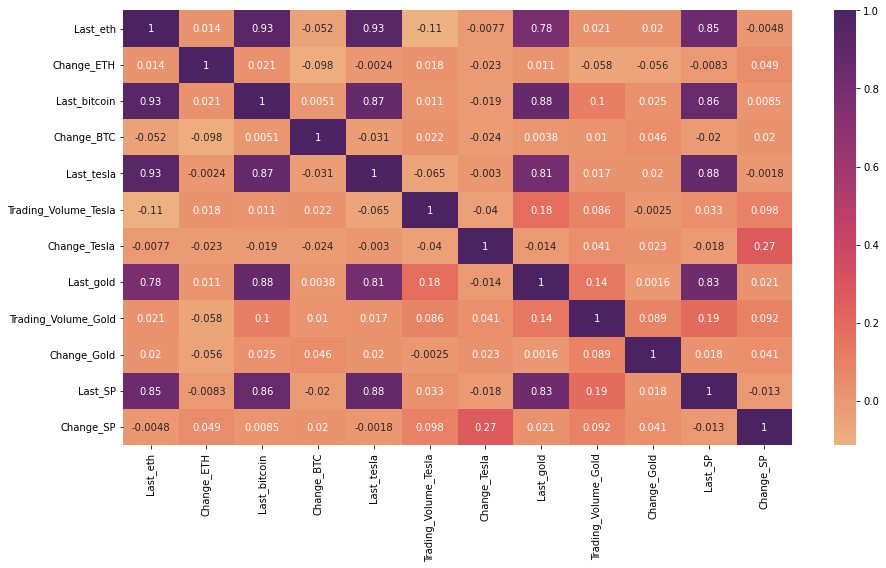

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



#heatmap
plt.figure(figsize = (15,8))
corr = crypto.corr()

#plot correlation matrix heatmap
hm = sns.heatmap(data = corr, annot = True, cmap = sns.color_palette("flare", as_cmap=True))

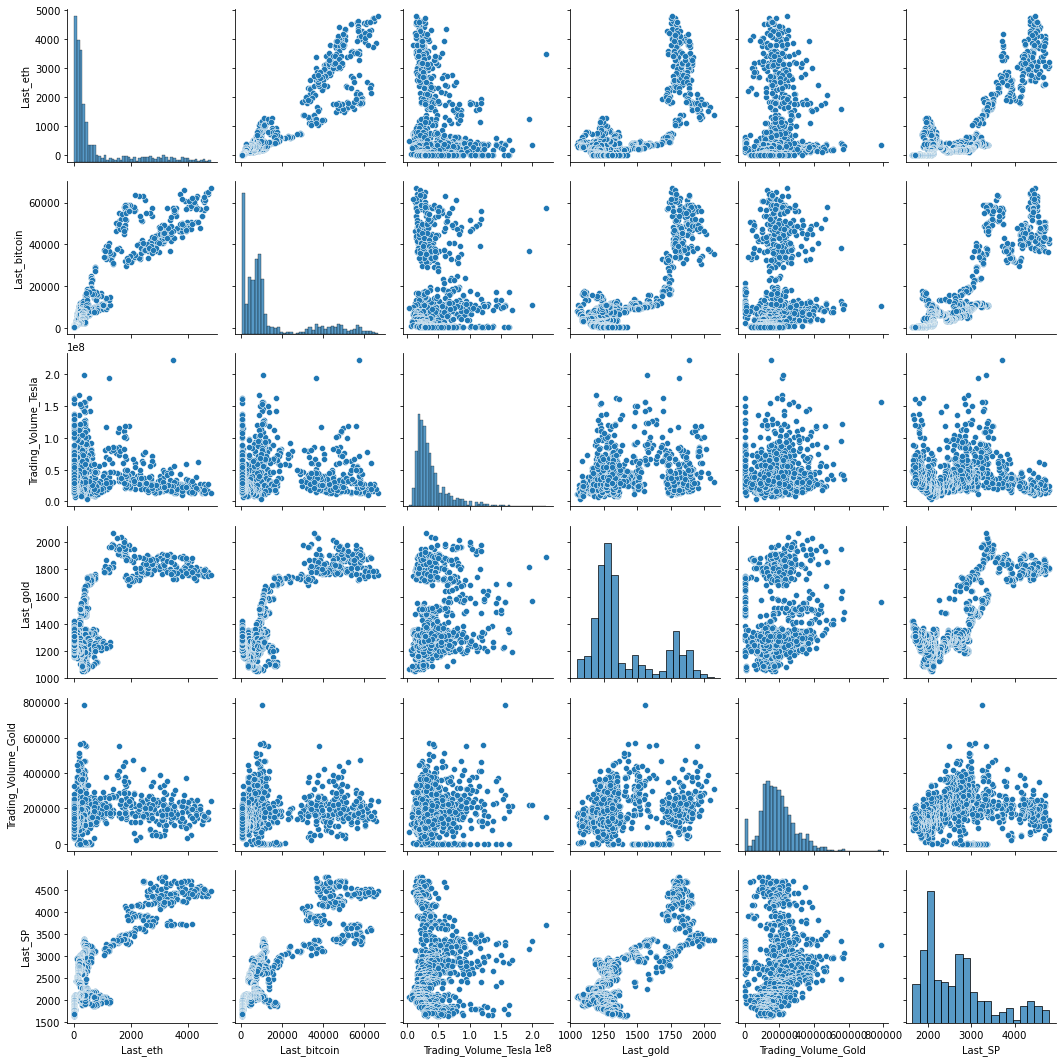

In [80]:
#Visualizing using pair plots

sns.pairplot(crypto)

In [90]:
#Multiple Linear regression
model_fit_bitcoin = smf.ols('Last_bitcoin ~ Last_tesla+Last_gold+Last_SP',data = crypto).fit()
print(model_fit_bitcoin.summary())

model_fit_eth = smf.ols('Last_eth ~ Last_tesla+Last_gold+Last_SP',data = crypto).fit()
print(' ')
print(' ')
print(' ')
print(model_fit_eth.summary())

                            OLS Regression Results                            
Dep. Variable:           Last_bitcoin   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     2456.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:31:16   Log-Likelihood:                -12771.
No. Observations:                1253   AIC:                         2.555e+04
Df Residuals:                    1249   BIC:                         2.557e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.303e+04   1676.703    -25.661      0.0

In [158]:
#crypto['Change_Tesla'] = crypto['Change_Tesla'].astype('float64')



x = crypto[['Last_tesla','Last_gold','Last_SP']]
y = crypto['Increase/Decrease']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train_1 = np.array(x_train)
y_train_1 = np.array(y_train)

print(np.isnan(x_train_1).any())

x_train_1 = np.nan_to_num(x_train_1)


# Fit model
qda_fit = QuadraticDiscriminantAnalysis()
model_qda = qda_fit.fit(x_train_1, y_train_1)
y_pred_qda = model_qda.predict(x_test)

y_pred_qda

False


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1])